<a href="https://colab.research.google.com/github/nreyesh/pytorch_initials/blob/main/05_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.

In [ ]:
import torch
from torch import nn

torch.__version__

'2.1.0+cu121'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Getting Data

In [5]:
import requests
import zipfile
from pathlib import Path

# Path to data folder
data_path = Path('dataset/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} this directory already exists... skipping download process')
else:
  print(f'{image_path} does not exist, creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

# Download dataset
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  f.write(request.content)

with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('Unzipping pizza, steak and sushi data...')
  zip_ref.extractall(image_path)

dataset/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


# 2. Data Preparation and Exploration

In [ ]:
# train and test paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

dataset/pizza_steak_sushi/train/sushi/821108.jpg
sushi
Image class: sushi | Image shape: (383, 512, 3) -> (hight, with, channels)


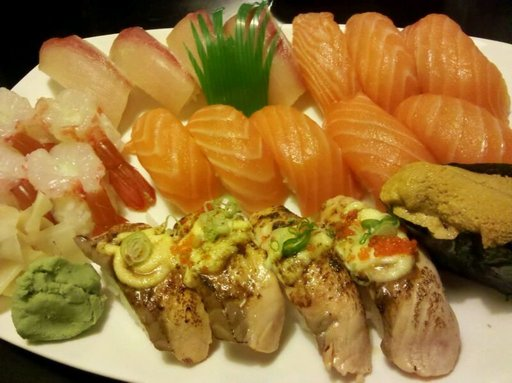

In [ ]:
import random
from PIL import Image
import numpy as np

# Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

# Get random image
random_image_path = random.choice(image_path_list)
print(random_image_path)

# Get image class
image_class = random_image_path.parent.stem
print(image_class)

# Load image
img = Image.open(random_image_path)
img_as_array = np.asarray(img)

print(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> (hight, with, channels)')
img

# 3. Transform Data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms,datasets

data_transform = transforms.Compose([
        transforms.Resize(size=(128,128)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
      ])

In [ ]:
print(data_transform(img).shape)
data_transform(img)

torch.Size([3, 128, 128])


tensor([[[0.0196, 0.0275, 0.0314,  ..., 0.0000, 0.0000, 0.0000],
         [0.0275, 0.0314, 0.0353,  ..., 0.0000, 0.0000, 0.0000],
         [0.0431, 0.0431, 0.0471,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.8667, 0.8745, 0.8745,  ..., 0.0706, 0.0784, 0.0706],
         [0.8667, 0.8745, 0.8784,  ..., 0.0706, 0.0745, 0.0706],
         [0.8627, 0.8706, 0.8745,  ..., 0.0706, 0.0745, 0.0667]],

        [[0.0196, 0.0235, 0.0235,  ..., 0.0000, 0.0000, 0.0000],
         [0.0235, 0.0275, 0.0235,  ..., 0.0000, 0.0000, 0.0000],
         [0.0392, 0.0353, 0.0353,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.8235, 0.8314, 0.8275,  ..., 0.0667, 0.0706, 0.0627],
         [0.8235, 0.8314, 0.8353,  ..., 0.0588, 0.0667, 0.0627],
         [0.8196, 0.8275, 0.8314,  ..., 0.0549, 0.0627, 0.0549]],

        [[0.0275, 0.0196, 0.0196,  ..., 0.0000, 0.0000, 0.0000],
         [0.0157, 0.0118, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0196, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.

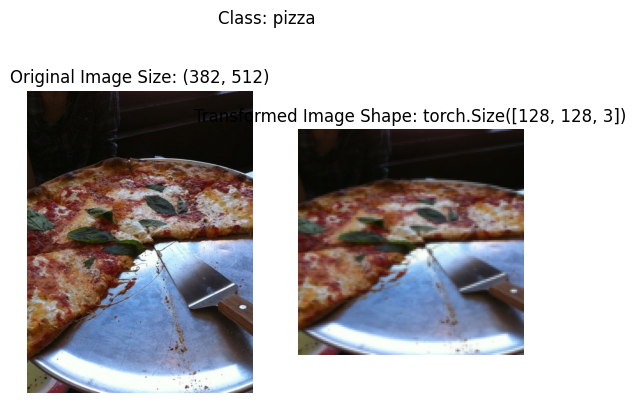

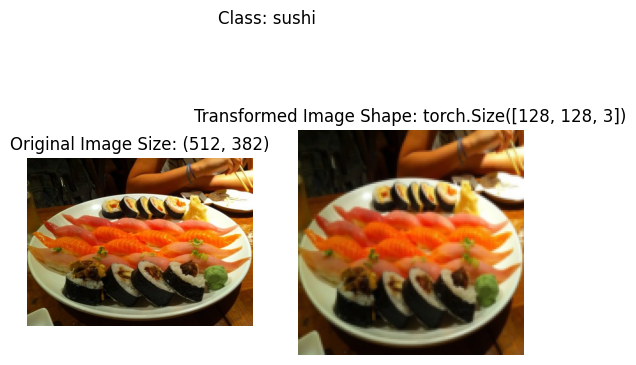

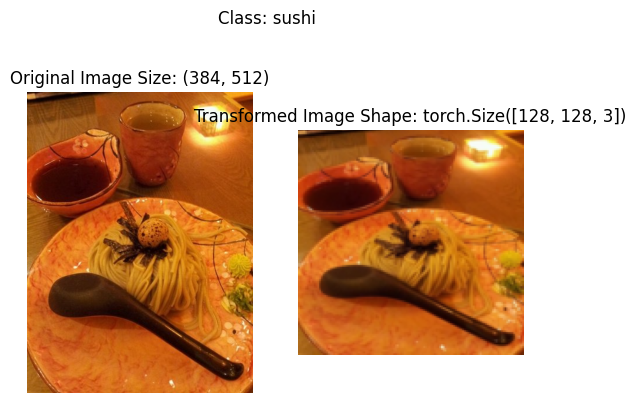

In [ ]:
import matplotlib.pyplot as plt

def plot_transfromed_image(image_paths_list, transform, n=3, seed=None):
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths_list, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original Image Size: {f.size}')
      ax[0].axis(False)

      # Image Transformation
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed Image Shape: {transformed_image.shape}')
      ax[1].axis('off')

      fig.suptitle(f'Class: {image_path.parent.stem}')

plot_transfromed_image(image_path_list, data_transform)

## Option 1: Load Data with ImageFolder

In [ ]:
from torchvision.datasets import ImageFolder

train_imageLoader = ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None,
                              )

test_imageLoader =ImageFolder(root=test_dir,
                              transform=data_transform,
                              target_transform=None)

train_imageLoader, test_imageLoader

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: dataset/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: dataset/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class name list
class_names = train_imageLoader.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class name idexes
class_indexes = train_imageLoader.class_to_idx
class_indexes

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_imageLoader.samples)

225

In [ ]:
train_imageLoader.root

PosixPath('dataset/pizza_steak_sushi/train')

In [ ]:
train_data, label = train_imageLoader[0][0],train_imageLoader[0][1]
train_data, label

(tensor([[[0.1137, 0.1137, 0.1059,  ..., 0.1098, 0.1098, 0.1137],
          [0.1137, 0.1098, 0.1059,  ..., 0.1216, 0.1216, 0.1255],
          [0.1098, 0.1059, 0.1020,  ..., 0.1294, 0.1294, 0.1333],
          ...,
          [0.0824, 0.0863, 0.0902,  ..., 0.1647, 0.1686, 0.1765],
          [0.0902, 0.0863, 0.0824,  ..., 0.1647, 0.1686, 0.1765],
          [0.0863, 0.0824, 0.0824,  ..., 0.1569, 0.1569, 0.1608]],
 
         [[0.0706, 0.0745, 0.0706,  ..., 0.0549, 0.0549, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0745, 0.0745, 0.0745,  ..., 0.0627, 0.0627, 0.0667],
          ...,
          [0.1059, 0.1098, 0.1098,  ..., 0.2275, 0.2275, 0.2314],
          [0.1059, 0.1020, 0.1020,  ..., 0.2275, 0.2314, 0.2314],
          [0.1020, 0.0980, 0.0980,  ..., 0.2353, 0.2275, 0.2275]],
 
         [[0.0941, 0.0980, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0941, 0.0941, 0.0902,  ..., 0.0235, 0.0235, 0.0235],
          [0.0941, 0.0941, 0.0902,  ...,

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_imageLoader,
                              batch_size=8,
                              shuffle=True)

test_dataLoader = DataLoader(test_imageLoader,
                             batch_size=8,
                             shuffle=False)

Features per batch: torch.Size([8, 3, 128, 128])
Labels per batch: torch.Size([8])


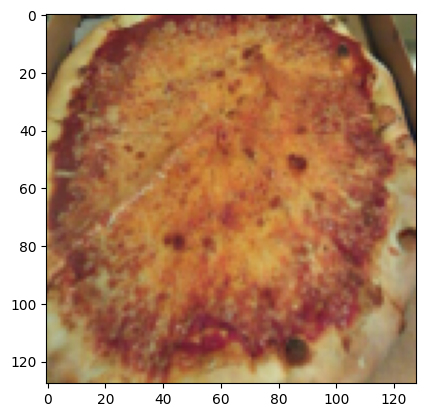

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

print(f'Features per batch: {train_features.size()}')
print(f'Labels per batch: {train_labels.size()}')

img = train_features[0].permute(1,2,0).squeeze()
plt.imshow(img)

# Option 2: Custom DataLoader

recreemos la funcionalidad de imageLoader

In [2]:
import os
import torch
from pathlib import Path


from PIL import Image
from torchvision import transforms
from typing import Tuple, Dict, List

In [11]:
# funcion para obtener las clases
image_path = 'dataset/pizza_steak_sushi/train/'
print(image_path)

dataset/pizza_steak_sushi/train/


In [12]:
classes = sorted([x.parts[-1] for x in Path(image_path).iterdir() if x.is_dir()])
class_to_idx = {}

for idx,name in enumerate(classes):
  print(idx,name)
  class_to_idx[name] = idx

0 pizza
1 steak
2 sushi


In [13]:
class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
def get_classes(directory: str)-> Tuple[List[str],Dict[str,int]]:
  classes = sorted([x.parts[-1] for x in Path(directory).iterdir() if x.is_dir()])

  if not classes:
    raise FileNotFoundError(f'Directory not found {directory}.. Revisar')

  class_to_idx = {class_name:idx for idx, class_name in enumerate(classes)}

  return classes, class_to_idx

aux = get_classes(image_path)
aux

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [40]:
import pathlib
from torch.utils.data import Dataset

class CustomImageLoader(Dataset):
  def __init__(self, directory: str, transforms=None):
    self.paths = list(pathlib.Path(directory).glob('*/*.jpg'))
    self.transform = transforms
    self.classes, self.class_to_idx = get_classes(directory)

  def load_image(self,path_to_img):
    return Image.open(path_to_img)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, idx: int):# -> tuple(torch.Tensor, int):
    img = self.load_image(self.paths[idx])
    class_name = self.paths[idx].parts[-2]
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      img = self.transform(img)

    return img, class_idx

In [36]:
from torchvision import transforms

train_transforms = transforms.Compose([
                  transforms.Resize(size=(128,128)),
                  transforms.RandomHorizontalFlip(p=0.5),
                  transforms.ToTensor()
                ])

test_transforms = transforms.Compose([
                  transforms.Resize(size=(128,128)),
                  transforms.ToTensor()
                ])

In [41]:
train_data_custom = CustomImageLoader('dataset/pizza_steak_sushi/train/',
                                      transforms=train_transforms)
test_data_custom = CustomImageLoader('dataset/pizza_steak_sushi/test/',
                                      transforms=train_transforms)


In [38]:
len(train_data_custom)

225

In [43]:
img, label = train_data_custom[0]
label

1

In [59]:
import random
import matplotlib.pyplot as plt
## Helper Function for Vizualization

def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n: int=10,
                          display_shape: bool = True,
                          seed: int=None):
  length = len(dataset)
  random_idxs = random.sample(range(0,length),n)
  plt.figure(figsize=(20,16))

  for i,idx in enumerate(random_idxs):
    img, label = dataset[idx]
    img = img.permute(1,2,0)
    class_name = classes[label]

    plt.subplot(1, n, i+1)
    plt.imshow(img)
    plt.title(f"Class {class_name}")
    plt.axis('off')


In [54]:
img, label = train_data_custom[10]
img.shape

torch.Size([3, 128, 128])

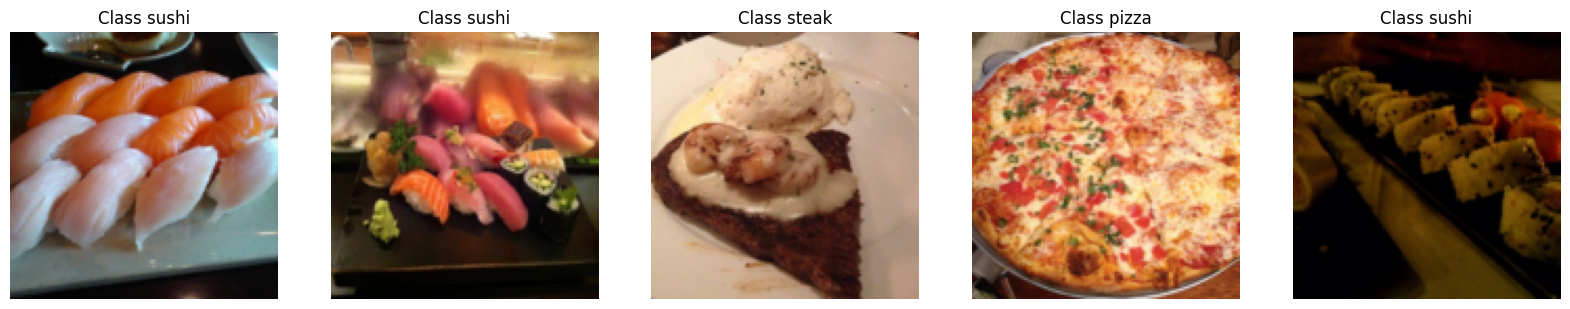

In [61]:
display_random_images(train_data_custom, train_data_custom.classes, 5)

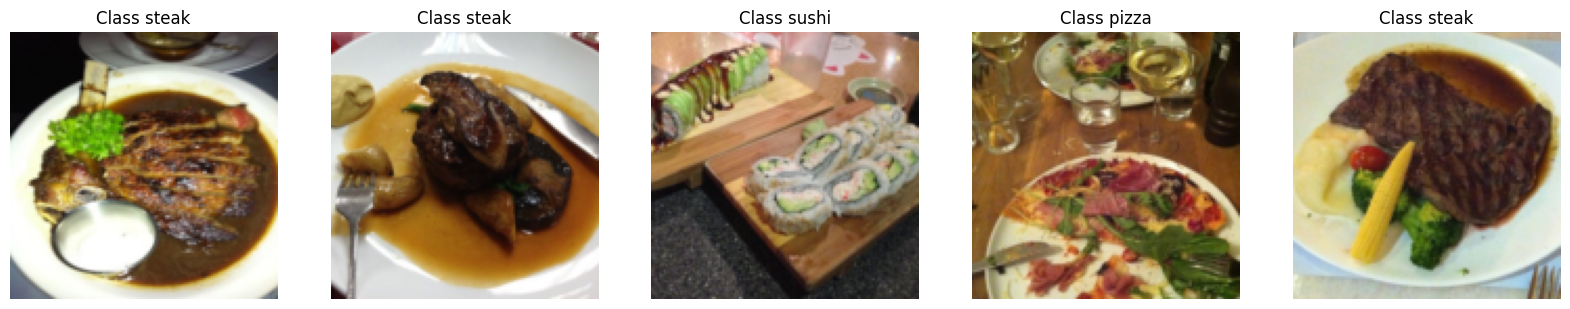

In [62]:
display_random_images(test_data_custom, test_data_custom.classes, 5)

In [63]:
# DataLoader

from torch.utils.data import DataLoader

BATCH_SIZE = 8

train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True)
test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size=BATCH_SIZE,
                                  )


In [73]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([8, 3, 128, 128]), torch.Size([8]))